In [1]:
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import vice

import sys
sys.path.append("../..")

In [3]:
import surp.analysis_scripts.rc_params
import surp.analysis_scripts.gas_phase_data as gap
import surp.analysis_scripts.plotting_utils as pluto
import surp.analysis_scripts.apogee_analysis as aah
from surp .analysis_scripts.vice_model import vice_model

In [4]:
sf = pluto.fig_saver("../figures")

In [13]:
v21 = aah.vincenzo2021()
r22 = aah.subgiants

In [6]:
def compare_stars(x, y, alpha=0.2, s=1, **kwargs):
    plt.scatter(v21[x], v21[y], alpha=alpha, s=s, label="V+21")
    x_r = aah.convert_name(x)
    y_r = aah.convert_name(y)
    plt.scatter(r22[x_r], r22[y_r], alpha=alpha, s=s, label="R+22")
    
    x_l = x.upper().replace("O", "$\\alpha$")
    y_l = y.upper().replace("O", "$\\alpha$")
    plt.xlabel(x_l)
    plt.ylabel(y_l)

In [7]:
def compare_means(x, y, alpha=0.2, s=1, xlim=None, **kwargs):
    pluto.plot_mean_track(v21[x], v21[y], label="V+21", xlim=xlim, plot_points=True, err_mean=True)
    x_r = aah.convert_name(x)
    y_r = aah.convert_name(y)
    
    filt = ~np.isnan(r22[x_r])
    filt &= ~np.isnan(r22[y_r])
    pluto.plot_mean_track(r22[filt][x_r], r22[filt][y_r], label="R+22", xlim=xlim, plot_points=True, err_mean=True)
    
    x_l = x.upper().replace("O", "$\\alpha$")
    y_l = y.upper().replace("O", "$\\alpha$")
    plt.xlabel(x_l)
    plt.ylabel(y_l)
    
    pluto.fancy_legend()

In [8]:
def compare_means_hi_lo(x, y, alpha=0.2, s=1, xlim=None, **kwargs):
    ha = v21["high_alpha"]
    
    params = {
        "xlim": xlim,
        "plot_points": True,
        "err_mean": True, 
        "min_count": 3,
        "alpha_bars": 0.5
    }
    pluto.plot_mean_track(v21[ha][x], v21[ha][y], label="V+21 high $\\alpha$", 
                          marker="^", c="k", **params)
    pluto.plot_mean_track(v21[~ha][x], v21[~ha][y], label="V+21 low $\\alpha$", 
                          marker="v", c="k", **params)

    x_r = aah.convert_name(x)
    y_r = aah.convert_name(y)
    
    filt = ~np.isnan(r22[x_r])
    filt &= ~np.isnan(r22[y_r])
    
    ha = r22["high_alpha"]
    pluto.plot_mean_track(r22[filt][ha][x_r], r22[filt][ha][y_r], label="subgiants high $\\alpha$", 
                          marker="^", c="r", **params)
    pluto.plot_mean_track(r22[filt][~ha][x_r], r22[filt][~ha][y_r], label="subgiants low $\\alpha$", 
                          marker="v", c="r", **params)

    x_l = x.upper().replace("O", "$\\alpha$")
    y_l = y.upper().replace("O", "$\\alpha$")
    plt.xlabel(x_l)
    plt.ylabel(y_l)
    
    pluto.legend_outside()

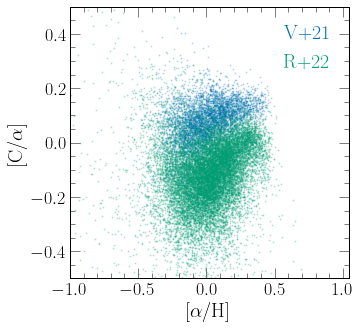

In [14]:
compare_stars("[o/h]", "[c/o]")
plt.xlim(-1)
plt.ylim(-0.5, 0.5)
pluto.fancy_legend(plt.gca())

/users/PAS2232/aeyobd/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


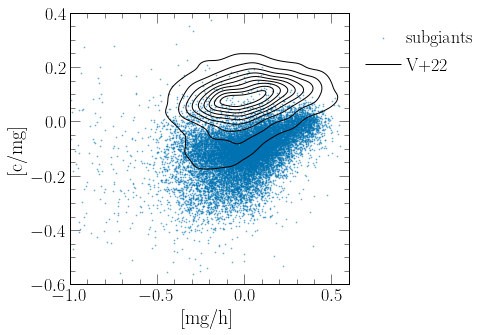

In [25]:
plt.scatter(r22["MG_H"], r22["C_MG"], s=0.5, alpha=0.5, label="subgiants")
aah.plot_v21_contour("[mg/h]", "[c/mg]", exclude_high_alpha=False, label="V+22")
plt.xlim(-1, 0.6)
plt.ylim(-0.6, 0.4)
pluto.legend_outside()
sf("fiorenzo_vs_jack_scatter_c")

/users/PAS2232/aeyobd/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


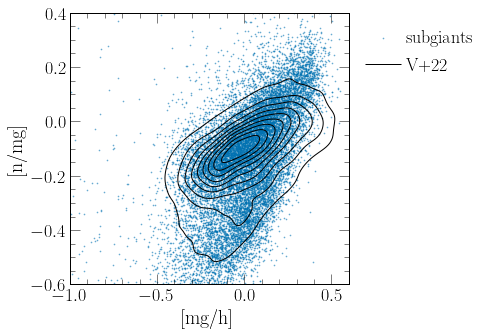

In [26]:
plt.scatter(r22["MG_H"], r22["N_MG"], s=0.5, alpha=0.5, label="subgiants")
aah.plot_v21_contour("[mg/h]", "[n/mg]", exclude_high_alpha=False, label="V+22")
plt.xlim(-1, 0.6)
plt.ylim(-0.6, 0.4)
pluto.legend_outside()
sf("fiorenzo_vs_jack_scatter_n")

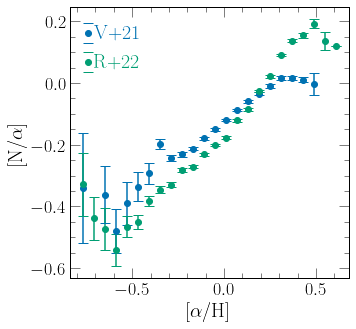

In [47]:
compare_means("[o/h]", "[n/o]", xlim=(-0.8, 1))

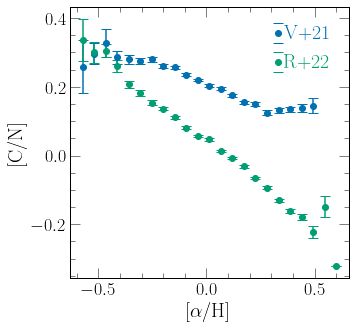

In [49]:
compare_means("[o/h]", "[c/n]", xlim=(-0.6, 1))

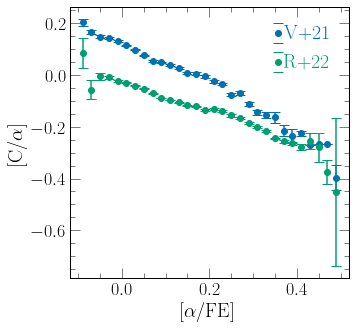

In [54]:
compare_means("[o/fe]", "[c/o]", xlim=(-0.1, 0.5))

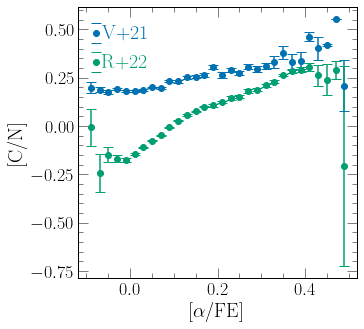

In [56]:
compare_means("[o/fe]", "[c/n]", xlim=(-0.1, 0.5))

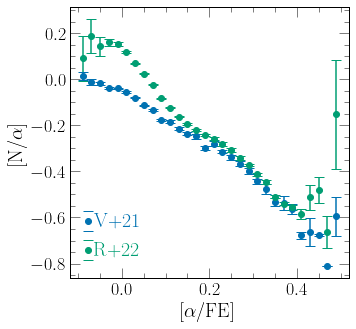

In [57]:
compare_means("[o/fe]", "[n/o]", xlim=(-0.1, 0.5))

In [82]:
v21

,[mg/fe],[fe/h],[c/fe],[n/fe],[c/h],[n/h],age,[c/n],[o/h],[n/o],[c/o],[c+n/h],[c+n/o],[o/fe],high_alpha
0,0.247532,-0.292042,0.222657,0.052401,-0.069385,-0.436210,10.1,0.376624,-0.079585,-0.356624,0.010201,-0.129447,-0.049862,0.212456,True
1,0.042202,0.049127,0.064234,0.197207,0.113361,0.006940,8.5,0.116219,0.073644,-0.066703,0.039717,0.091440,0.017796,0.024517,False
2,0.290692,-0.351292,0.228333,0.091762,-0.122959,-0.484260,8.8,0.371100,-0.169290,-0.314970,0.046331,-0.182400,-0.013110,0.182002,True
3,0.027853,-0.178222,0.108308,0.202450,-0.069914,-0.290230,3.6,0.230115,-0.128322,-0.161908,0.058408,-0.110926,0.017395,0.049900,False
4,0.257632,-0.211932,0.222123,0.196530,0.010191,-0.179516,13.7,0.199505,0.014441,-0.193956,-0.004250,-0.026094,-0.040535,0.226372,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5071,0.054724,-0.221732,0.068477,0.360880,-0.153254,-0.250104,1.6,0.106649,-0.229760,-0.020344,0.076506,-0.173374,0.056385,-0.008028,False
5072,0.063233,0.008628,0.072616,0.167090,0.081244,-0.063674,9.1,0.154717,0.041089,-0.104763,0.040155,0.052400,0.011311,0.032461,False
5073,0.109576,0.281778,0.165376,0.196150,0.447155,0.301935,11.1,0.155018,0.364991,-0.063056,0.082164,0.418258,0.053267,0.083213,False
5074,-0.041400,0.154678,0.112238,0.448730,0.266917,0.225569,1.0,0.051146,0.167322,0.058247,0.099595,0.257891,0.090569,0.012643,False


In [88]:
v21 = aah.vincenzo2021()

/users/PAS2232/aeyobd/.local/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<ErrorbarContainer object of 3 artists>

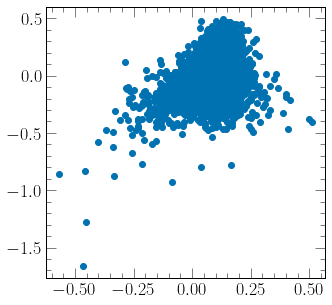

In [28]:
plt.errorbar(v21["[c/o]"], v21["[o/h]"], ls="", marker="o")

/apps/project/ondemand/app_jupyter/3.0.17/lib64/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/apps/project/ondemand/app_jupyter/3.0.17/lib64/python3.6/site-packages/ipykernel_launcher.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


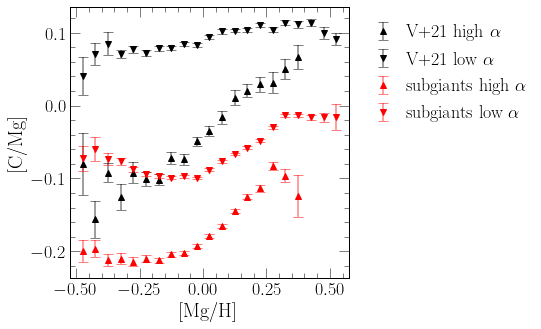

In [27]:
compare_means_hi_lo("[mg/h]", "[c/mg]", xlim=(-0.5, 1))
plt.xlabel("[Mg/H]")
plt.ylabel("[C/Mg]")
sf("fiorenzo_vs_jack_c")

/apps/project/ondemand/app_jupyter/3.0.17/lib64/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/apps/project/ondemand/app_jupyter/3.0.17/lib64/python3.6/site-packages/ipykernel_launcher.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


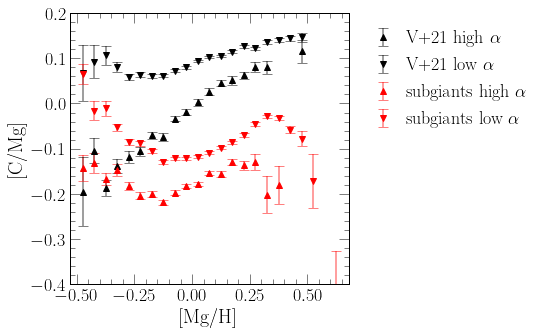

In [30]:
compare_means_hi_lo("[o/h]", "[c/o]", xlim=(-0.5, 1))
plt.xlabel("[Mg/H]")
plt.ylabel("[C/Mg]")
plt.ylim(-0.4)
sf("fiorenzo_vs_jack_c")

/apps/project/ondemand/app_jupyter/3.0.17/lib64/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/apps/project/ondemand/app_jupyter/3.0.17/lib64/python3.6/site-packages/ipykernel_launcher.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


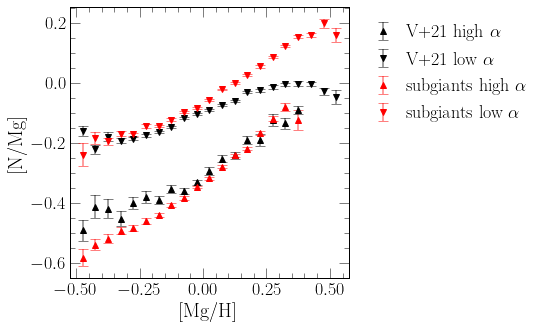

In [28]:
compare_means_hi_lo("[mg/h]", "[n/mg]", xlim=(-0.5, 1))
plt.xlabel("[Mg/H]")
plt.ylabel("[N/Mg]")
sf("fiorenzo_vs_jack_n")

In [91]:
import pickle

In [102]:
with open("../data/CNOdredgeup.obj", "rb") as f:
    raw = pickle.load(f)

In [135]:
aah.vincenzo2021_raw()

,MgFe_stars_bracket,FeH_stars_bracket,CFe_stars_bracket,NFe_stars_bracket,CHbirth_stars_bracket,NHbirth_stars_bracket,age_stars,CN_stars,CNbirth_stars,NO_stars,NObirth_stars,apogee_id
0,0.2475317,-0.29204154,0.15851,0.052401006,-0.06938452311813138,-0.4362096180407065,10.1,0.71610904,0.9768250949225754,-1.022404,-1.21676373213506,2M18401164+4324434
1,0.042201698,0.049127452,-0.016018,0.197207,0.11336098384376919,0.006940463571630362,8.5,0.396775,0.7164205202721392,-0.692918,-0.9268427586290454,2M18401969+4348380
2,0.29069167,-0.35129154,0.15389997,0.09176198,-0.12295861541394022,-0.4842596668907968,8.8,0.672138,0.971301051476857,-0.954733,-1.1751092456841152,2M18403209+4317133
3,0.0278527,-0.17822155,-0.012749001,0.20245,-0.06991398111350443,-0.2902300959828624,3.6,0.39480102,0.8303161148693583,-0.71551,-1.0220474953252638,2M18405556+4353012
4,0.2576317,-0.21193154,0.16814,0.19653,0.010191171252439707,-0.17951558089244635,13.7,0.58161,0.7997067521448864,-0.889425,-1.0540956114634223,2M18405585+4347083
...,...,...,...,...,...,...,...,...,...,...,...,...
5071,0.05472371,-0.22173154,-0.112969995,0.36088002,-0.15325415385810073,-0.25010415827044014,1.6,0.13615,0.7068500044123397,-0.497167,-0.8804836428311942,2M20045775+4438155
5072,0.063233495,0.008627651,-0.007638201,0.16708979,0.08124413531259206,-0.06367404328898521,9.1,0.43527204,0.7549181786015776,-0.730977,-0.9649021997560261,2M20055400+4415544
5073,0.10957569,0.28177845,0.10704699,0.19615,0.44715463683944706,0.301934969489679,11.1,0.52089703,0.7552196673497684,-0.74711996,-0.9231953688775869,2M20061426+4436582
5074,-0.041400306,0.15467845,-0.06000101,0.44873,0.26691672804808625,0.2255690303259556,1.0,0.10126901,0.651347697722131,-0.4288752,-0.8018918749556199,2M20062364+4427383


In [148]:
df = aah.vincenzo2021_raw()

In [182]:
v21 = aah.vincenzo2021()

(-0.8, 0.6)

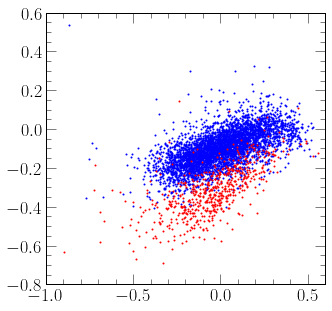

In [197]:
df = v21[v21["high_alpha"]]
plt.scatter(df["[mg/h]"], df["[n/mg]"], s=1, c="r")
df = v21[~v21["high_alpha"]]
plt.scatter(df["[mg/h]"], df["[n/mg]"], s=1, zorder=-2, color="b")
plt.xlim(-1, 0.6)
plt.ylim(-0.8, 0.6)

In [ ]:
plt.scatter(v21["[mg/h]"], v21["[c/mg]"], s=1)

In [128]:
aah.logNO_bracket_conversion(np.pi)

4.001731918618052

In [129]:
aah.log_to_bracket(np.pi, "n", "o")

4.001742765592496

In [111]:
np.log10(vice.solar_z("c")/aah.mm_of_elements["c"])

-3.706656316445973

In [112]:
aah.mm_of_elements["n"]

14.0067

In [113]:
np.log10(vice.solar_z("n")/14)

-4.30664998830404

In [114]:
np.log10(vice.solar_z("o")/16)

-3.4467239538629006

In [105]:
vice.solar_z("n")

0.000691

In [106]:
for elem in ("c", "n", "o"):
    print(np.log10(vice.solar_z(elem)))

-2.6270879970298933
-3.1605219526258015
-2.2426039712069756


In [95]:
raw[0]

'tt, MgFe_stars_bracket, FeH_stars_bracket, CFe_stars_bracket, NFe_stars_bracket, CHbirth_stars_bracket, NHbirth_stars_bracket, age_stars, CN_stars, CNbirth_stars, NO_stars, NObirth_stars, apogee_id, chsolar, nhsolar, ohsolar'

In [96]:
raw[1]

array([ 0.2475317 ,  0.0422017 ,  0.29069167, ...,  0.10957569,
       -0.04140031,  0.0696037 ], dtype=float32)

In [98]:
len(raw)

16

In [100]:
len(raw[0].split(","))

16